In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('dsb-24-german-credit/german_credit_train.csv')

In [11]:
df.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            3999 non-null   object
 1   LoanDuration              3999 non-null   int64 
 2   CreditHistory             3999 non-null   object
 3   LoanPurpose               3999 non-null   object
 4   LoanAmount                3999 non-null   int64 
 5   ExistingSavings           3999 non-null   object
 6   EmploymentDuration        3999 non-null   object
 7   InstallmentPercent        3999 non-null   int64 
 8   Sex                       3999 non-null   object
 9   OthersOnLoan              3999 non-null   object
 10  CurrentResidenceDuration  3999 non-null   int64 
 11  OwnsProperty              3999 non-null   object
 12  Age                       3999 non-null   int64 
 13  InstallmentPlans          3999 non-null   object
 14  Housing                 

In [15]:
df.shape

(3999, 21)

In [16]:
df.isnull().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

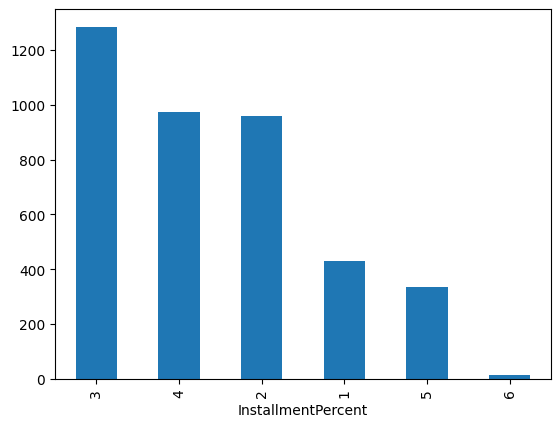

In [17]:
df['InstallmentPercent'].value_counts().plot(kind='bar')
plt.show()

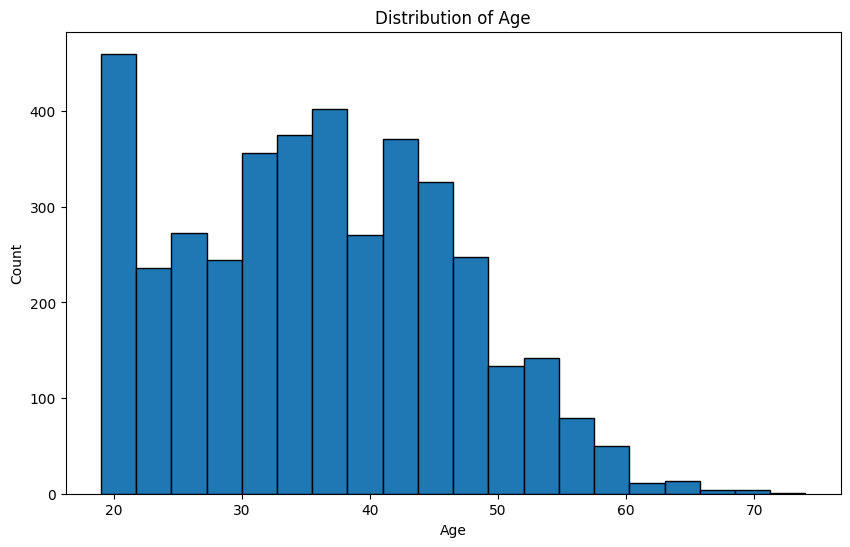

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"{col}: {n_unique} categories")

CheckingStatus: 4 categories
CreditHistory: 5 categories
LoanPurpose: 11 categories
ExistingSavings: 5 categories
EmploymentDuration: 5 categories
Sex: 2 categories
OthersOnLoan: 3 categories
OwnsProperty: 4 categories
InstallmentPlans: 3 categories
Housing: 3 categories
Job: 4 categories
Telephone: 2 categories
ForeignWorker: 2 categories
Risk: 2 categories


In [27]:
for col in categorical_cols:
    print(f"\n{col} ({df[col].nunique()} categories):")
    print(df[col].unique())


CheckingStatus (4 categories):
['0_to_200' 'less_0' 'no_checking' 'greater_200']

CreditHistory (5 categories):
['credits_paid_to_date' 'prior_payments_delayed' 'outstanding_credit'
 'all_credits_paid_back' 'no_credits']

LoanPurpose (11 categories):
['other' 'car_new' 'furniture' 'retraining' 'education' 'vacation'
 'appliances' 'car_used' 'radio_tv' 'repairs' 'business']

ExistingSavings (5 categories):
['100_to_500' 'less_100' '500_to_1000' 'unknown' 'greater_1000']

EmploymentDuration (5 categories):
['less_1' '1_to_4' 'greater_7' '4_to_7' 'unemployed']

Sex (2 categories):
['female' 'male']

OthersOnLoan (3 categories):
['none' 'co-applicant' 'guarantor']

OwnsProperty (4 categories):
['savings_insurance' 'real_estate' 'unknown' 'car_other']

InstallmentPlans (3 categories):
['none' 'stores' 'bank']

Housing (3 categories):
['own' 'free' 'rent']

Job (4 categories):
['skilled' 'management_self-employed' 'unskilled' 'unemployed']

Telephone (2 categories):
['none' 'yes']

ForeignW

In [28]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col != 'Dependents']


for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {len(outliers)} outliers")

LoanDuration: 8 outliers
LoanAmount: 1 outliers
InstallmentPercent: 0 outliers
CurrentResidenceDuration: 0 outliers
Age: 5 outliers
ExistingCreditsCount: 0 outliers
